In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# 6.28

In [2]:
import numpy as np

def Pi(y):
    """Returns the ranking of the argument.
    :param y: a 2d array of size N x K or a 1d array of size K, N input vectors/1 vector to generate the rankings
    
    :return: a 2d numpy array with ith row being the ranking of the ith row of y if y is a 2d array, 
    and a 1d ranking (numpy array) if y is a 1d array
    """
    y = np.array(y)
    if y.ndim == 1:
        ranking = np.argsort(np.argsort(y)) + 1
    else:
        ranking = np.argsort(np.argsort(y, axis = -1), axis = -1) + 1
    return ranking

# Data generation
N = N_test = 500
d = 20
K = 10

np.random.seed(0)

# Generate the true theta matrix
theta_true = np.random.randn(K,d)
theta_true /= np.linalg.norm(theta_true[:])

# Sample x_i from standard Gaussian
X_test = np.hstack([np.random.randn(N_test,  d-1), np.ones((N_test, 1))])
X_train = np.hstack([np.random.randn(N,  d-1), np.ones((N, 1))])

# Generate the true features y = theta x and add noise to them
Y_train, Y_test = X_train.dot(theta_true.T), X_test.dot(theta_true.T)

# Add 15dB of noise to the observed y to generate noisy rankings
noise_snr = 15.
sigma_noise = 10 ** (-0.05 * noise_snr) / np.sqrt(K)
Y_train, Y_test = Y_train + sigma_noise * np.random.randn(N, K), Y_test + sigma_noise * np.random.randn(N_test, K)

# Get the rankins of the observed noisy data
pi_train, pi_test = Pi(Y_train), Pi(Y_test)

Solution

In [18]:
theta = cp.Variable((K, d))
obj = cp.Minimize(cp.sum((cp.norm(pi_train - X_train@theta.T, 1, axis = 1))))
prob = cp.Problem(obj)
prob.solve()
theta_hat = theta.value

avg_train_dist = np.sum(np.linalg.norm(pi_train - Pi(X_train@theta_hat.T), axis = 1))/(2*N)
avg_test_dist = np.sum(np.linalg.norm(pi_test - Pi(X_test@theta_hat.T), axis = 1))/(2*N)
print("Average training distance: ", avg_train_dist)
print("Average test distance: ", avg_test_dist)

Average training distance:  1.2410474173532646
Average test distance:  1.3108211836569548


In [ ]:
# Solve the problem
c = cp.Variable(n)
y_unknown = cp.Variable(K-M)
obj = cp.Minimize(cp.norm(X.T@c - cp.hstack((y,y_unknown)),2))
constraints = [ y_unknown <= D]
prob = cp.Problem(obj, constraints)
prob.solve()
c_opt = c.value
print(f'Optimal c using method from a) is {c_opt}')

obj = cp.Minimize(cp.norm((X.T@c)[:M] - y,2))
prob = cp.Problem(obj, [])
prob.solve()
c_ls = c.value
print(f'Least squares c is {c_ls}')

c_true_norm = np.linalg.norm(c_true,2)
print(f'Relative error in c_opt is {np.linalg.norm(c_opt-c_true,2)/c_true_norm}')
print(f'Relative error in c_ls is {np.linalg.norm(c_ls-c_true,2)/c_true_norm}')


# 7.16

In [70]:
n = 4
N = 171

Ex = np.array([  0.5266, 16.6962, 2.7494, 2.5215,]).T
y = np.matrix([6,          6,         10,         10,          6,         15,         12,         16,         14,         10,          5,          8,         11,         17,          6,         18,         11,         11,         11,         20,         10,         16,         11,         11,          9,          6,          8,         16,          5,         10,         10,         12,          6,         15,         10,         10,          8,         14,         10,         10,         14,         18,         16,          9,         15,         15,          9,          1,          1,          1,         12,         13,          1,         11,          1,         11,         10,          1,         14,         13,         10,         15,          1,          7,          7,         16,          1,         14,         16,         10,          9,          9,         11,         15,         13,          9,          8,         18,         10,         10,          7,          8,         10,          8,          6,          1,         17,         14,          7,          9,         12,         11,          6,         13,         12,         11,          1,         12,          1,         18,         13,          8,         15,          8,         10,          8,          8,         12,          8,         14,          1,          9,          1,          1,         14,         11,         14,         10,          9,          9,          8,         12,         10,         11,         12,         14,         11,         13,         11,         12,         10,          1,         13,         11,         13,         11,          1,         10,         11,         11,         11,          8,         14,         11,          1,         10,          9,          8,          8,         10,         16,         13,         12,         15,         12,          1,         11,         12,         11,          5,         10,         10,          7,          1,          1,          8,          1,          9,         16,          7,          9,]).T
x = np.matrix([[1,    18,     4,     4],     [1,    17,     1,     1],     [1,    15,     1,     1],     [1,    16,     3,     3],     [1,    17,     4,     4],     [0,    15,     3,     4],     [1,    15,     2,     1],     [0,    15,     2,     2],     [1,    16,     4,     4],     [1,    16,     3,     3],     [0,    17,     3,     2],     [1,    16,     2,     2],     [0,    15,     2,     2],     [0,    15,     4,     4],     [1,    15,     2,     3],     [0,    15,     4,     3],     [1,    15,     3,     4],     [0,    15,     2,     2],     [1,    16,     3,     3],     [0,    16,     4,     3],     [1,    16,     2,     1],     [1,    16,     4,     2],     [1,    16,     4,     4],     [1,    16,     1,     1],     [1,    16,     4,     3],     [1,    16,     3,     1],     [1,    15,     2,     2],     [1,    15,     3,     1],     [1,    15,     1,     1],     [0,    15,     4,     0],     [0,    17,     2,     1],     [0,    15,     2,     3],     [1,    15,     3,     2],     [0,    15,     2,     2],     [1,    15,     1,     1],     [0,    16,     2,     2],     [1,    16,     3,     3],     [0,    15,     2,     2],     [1,    15,     1,     1],     [1,    16,     2,     1],     [1,    16,     4,     4],     [0,    16,     3,     3],     [1,    16,     4,     4],     [0,    15,     2,     1],     [1,    15,     1,     2],     [0,    15,     2,     2],     [1,    19,     0,     1],     [0,    18,     2,     2],     [1,    15,     1,     1],     [1,    15,     4,     4],     [0,    16,     1,     1],     [1,    16,     1,     1],     [0,    17,     2,     1],     [1,    15,     1,     1],     [1,    15,     3,     2],     [1,    15,     1,     2],     [0,    15,     2,     1],     [0,    18,     1,     1],     [0,    16,     2,     1],     [0,    17,     1,     2],     [1,    18,     1,     1],     [0,    16,     2,     2],     [0,    17,     2,     1],     [0,    15,     3,     2],     [0,    17,     1,     1],     [1,    16,     4,     2],     [1,    16,     2,     2],     [1,    16,     4,     4],     [0,    16,     1,     0],     [0,    17,     4,     4],     [1,    16,     3,     3],     [0,    17,     4,     3],     [1,    16,     2,     2],     [0,    16,     2,     1],     [1,    16,     2,     3],     [1,    17,     1,     1],     [0,    17,     1,     2],     [1,    17,     4,     4],     [1,    17,     1,     1],     [1,    16,     1,     1],     [1,    17,     4,     3],     [0,    18,     2,     2],     [1,    17,     4,     4],     [0,    18,     3,     3],     [1,    17,     2,     1],     [1,    17,     1,     1],     [1,    16,     2,     3],     [1,    16,     4,     4],     [1,    18,     3,     1],     [0,    18,     2,     1],     [1,    17,     2,     1],     [0,    17,     2,     2],     [0,    16,     1,     1],     [0,    17,     2,     2],     [1,    16,     2,     1],     [1,    17,     2,     1],     [0,    18,     2,     2],     [0,    17,     4,     3],     [1,    18,     2,     1],     [0,    16,     2,     1],     [0,    17,     2,     3],     [0,    22,     3,     1],     [0,    16,     0,     2],     [0,    18,     3,     2],     [0,    16,     3,     3],     [0,    18,     2,     1],     [0,    16,     2,     1],     [0,    17,     2,     1],     [0,    17,     1,     1],     [0,    18,     2,     1],     [1,    17,     2,     2],     [1,    17,     3,     3],     [1,    18,     2,     2],     [1,    18,     2,     1],     [1,    18,     2,     3],     [1,    18,     1,     1],     [0,    17,     1,     2],     [1,    17,     2,     4],     [1,    18,     3,     2],     [0,    18,     4,     4],     [0,    17,     4,     1],     [1,    18,     1,     1],     [1,    18,     1,     1],     [0,    17,     1,     1],     [1,    17,     1,     1],     [0,    18,     2,     1],     [0,    18,     4,     2],     [1,    18,     2,     1],     [0,    17,     3,     3],     [1,    18,     2,     4],     [1,    19,     1,     1],     [1,    19,     1,     2],     [1,    19,     2,     1],     [0,    19,     1,     2],     [1,    19,     1,     1],     [1,    19,     2,     3],     [1,    18,     2,     1],     [1,    17,     3,     4],     [1,    18,     4,     4],     [1,    17,     2,     2],     [0,    18,     4,     4],     [0,    18,     2,     2],     [1,    17,     2,     4],     [1,    19,     2,     1],     [1,    17,     2,     2],     [1,    18,     2,     3],     [0,    18,     4,     3],     [0,    19,     1,     1],     [0,    19,     1,     1],     [0,    18,     1,     1],     [1,    18,     1,     1],     [1,    18,     1,     4],     [0,    18,     1,     1],     [1,    17,     4,     4],     [1,    17,     1,     2],     [1,    17,     1,     1],     [1,    18,     4,     4],     [0,    18,     1,     2],     [1,    17,     2,     2],     [1,    17,     1,     2],     [1,    18,     1,     1],     [1,    18,     4,     4],     [0,    18,     2,     1],     [0,    19,     1,     1],     [1,    19,     2,     3],     [1,    18,     3,     1],     [1,    18,     1,     1],     [0,    20,     2,     2],     [0,    17,     3,     1],     [0,    21,     1,     1],     [0,    19,     1,     1],])
p_true = np.array([0.096203,      0.000000,      0.000000,      0.002532,      0.017722,      0.037975,      0.022785,      0.081013,      0.070886,      0.141772,      0.118987,      0.078481,      0.078481,      0.068354,      0.083544,      0.040506,      0.015190,      0.030380,      0.012658,      0.002532,]).T
p_empirical = np.array([0.122807,      0.000000,      0.000000,      0.000000,      0.017544,      0.046784,      0.035088,      0.093567,      0.076023,      0.146199,      0.134503,      0.076023,      0.052632,      0.064327,      0.046784,      0.046784,      0.011696,      0.023392,      0.000000,      0.005848,]).T

c:\Users\anujs\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 84 times so far.

  warnings.warn(msg, UserWarning)


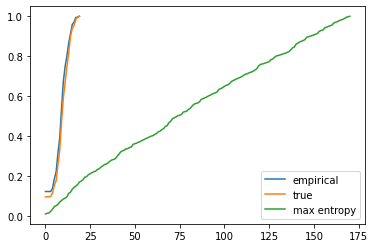

In [73]:
pi = cp.Variable(N)
# reshape Ex to be a column vector
#Ex = np.asarray(Ex).ravel()
constraints = [pi >= 0, cp.sum(pi) == 1, 
               pi * x == Ex]
# max entropy of pi
objective = cp.Maximize(cp.sum(cp.entr(pi)))
prob = cp.Problem(objective, constraints)
prob.solve()
pi_star = pi.value
#print("pi_star = ", pi_star)

# plot true and empirical cumulative distributions

plt.plot(np.cumsum(p_empirical), label='empirical')
plt.plot(np.cumsum(p_true), label='true')
plt.plot(np.cumsum(pi_star), label='max entropy')
plt.legend()
#np.cumsum(p_empirical)


# 21.22

In [ ]:
p = np.array([4,2,2,1])
d = np.array([20, 5, 10, 15])
s = np.array([30, 10, 5, 0])
d_t = np.array([10, 25, 5, 15])
s_t = np.array([5, 20, 15, 20])
k=0.5

B = cp.Variable((4,4))
B_t = cp.Variable((4,4))
t = cp.Variable(4)
constraints = [B[0,1] == 0, B[0,2] == 0, B[0,3] == 0, B[1,2] == 0, B[1,3] == 0, B[2,1] == 0, B[2,3] == 0,
               B_t[0,1] == 0, B_t[0,2] == 0, B_t[0,3] == 0, B_t[1,2] == 0, B_t[1,3] == 0, B_t[2,1] == 0, B_t[2,3] == 0,
               cp.sum(B, axis=0) <= s-t, cp.sum(B_t, axis=0) <= s_t+t, 
               cp.sum(B, axis=1) >= d, cp.sum(B_t, axis=1) >= d_t,
               ]
obj = cp.Minimize(cp.sum((B+B_t) @ p) + k*cp.norm1(t))
prob = cp.Problem(obj, constraints)
prob.solve()
print(f'Optimal t is {t.value}')
print(f'Optimal B is {B.value}')
print(f'Optimal B_t is {B_t.value}')
print(f'Optimal cost is {prob.value}')

constraints = constraints + [ t ==0]
prob = cp.Problem(obj, constraints)
prob.solve()
print(f'With t=0, problem is {prob.status}')


Optimal t is [-1.24999317 -1.24999702 -1.25000108 -1.25000874]
Optimal B is [[ 2.00000000e+01 -4.30310026e-17 -3.35490570e-17 -3.12916996e-17]
 [ 9.99999495e-01  4.00000050e+00  2.19849571e-18  4.45585275e-18]
 [ 5.99999814e+00 -1.67684605e-17  4.00000186e+00 -5.02912678e-18]
 [ 4.24999551e+00  7.24999652e+00  2.24999922e+00  1.25000874e+00]]
Optimal B_t is [[ 1.00000000e+01 -3.87694037e-17 -4.50886987e-17 -7.22819015e-17]
 [ 7.33333383e+00  1.76666662e+01 -3.99360483e-17 -6.71292508e-17]
 [-4.33333148e+00 -1.14810476e-17  9.33333148e+00 -4.49935451e-17]
 [-9.24999552e+00  1.08333682e+00  4.41666744e+00  1.87499913e+01]]
Optimal cost is 262.49999993324
With t=0, problem is infeasible
